# Twitter-Sentiment-Analysis

# Required Libraries

In [185]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline
import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem.porter import *
stemmer = PorterStemmer()
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, classification_report
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize as WordTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords, wordnet
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import Word
from textblob import TextBlob
import sys
import tweepy
import wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords, wordnet
STOPWORDS = stopwords.words('english')
import mglearn as mglearn
warnings.filterwarnings("ignore")

### Functions

##### Removing a pattern of text

In [186]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

##### Removing contractions

In [187]:
def decontract(text):
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

##### Preprocessing text

In [188]:
def preprocess_text(review):
    review = remove_pattern(review, "@[\w]*")# Remove words starting with'@'
    review = re.sub('[^a-zA-Z#]', ' ', review)
    review = re.sub(r"http\S+", "", review)             
    review = BeautifulSoup(review, 'lxml').get_text()   
    review = decontract(review)                         
    review = re.sub("\S*\d\S*", "", review).strip()     
    review = re.sub('RT', ' ', review)
    review = re.sub('[0-9]+', ' ', review)
    review = re.sub('#', ' ', review) 
    review = review.lower()                             
    review = [word for word in review.split(" ") if not word in STOPWORDS] 
    review = " ".join(review)
    review.strip()
    return review




##### Plot wordcloud

In [321]:
def wordcloud_draw(data, color = 'white'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=900,
                      height=500, max_words=50,collocations=False,
                      
                      relative_scaling=0.5
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [190]:
# Importing the keys #
consumerKey = " "
consumerSecret = " "
accessToken = " "
accessTokenSecret = " "

In [191]:
# Establish the connection with API #
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [192]:
# Search for the Term and define number of tweets #
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

Enter Keyword/Tag to search about: Online classes during Covid 19
Enter how many tweets to search: 200


In [193]:
# Get no of tweets and searched term together #
tweets = tweepy.Cursor(api.search, q=searchTerm,lang="en").items(NoOfTerms)

##### Inserting data since 2021 March

In [194]:
date_since = "2020-03-1"

##### Converting tweets into dataframes

In [195]:
posts =[]
for tweet in tweets:
    posts.append([tweet.user.screen_name,tweet.user.location,tweet.text])


df = pd.DataFrame(posts)
df.to_csv('datanew.csv',index=False,header=["username","location","text"])



In [196]:
tweet_data = pd.read_csv('datanew.csv')
tweet_data.head()

,username,location,text
0,Dhirajreddy47,"Hyderabad, India",RT @Dhirajreddy47: @nidhiindiatv Sir I am 10th...
1,HinduHridayasya,NaN,"RT @OpIndia_com: During Covid-19 lockdown, the..."
2,aniket1897,Bharat,"RT @OpIndia_com: During Covid-19 lockdown, the..."
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the..."
4,ShahramBajkani1,Sindh,RT @raja_bajkani: According to world bank repo...


In [197]:
length_tweet_data = tweet_data['text'].str.len()

##### Plotting bin diagram for length of the tweets

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 192.]),
 array([134.   , 134.075, 134.15 , 134.225, 134.3  , 134.375, 134.45 ,
        134.525, 134.6  , 134.675, 134.75 , 134.825, 134.9  , 134.975,
        135.05 , 135.125, 135.2  , 135.275, 135.35 , 135.425, 135.5  ,
        135.575, 135.65 , 135.725, 135.8  , 135.875, 135.95 , 136.025,
        136.1  , 136.175, 136.25 , 136.325, 136.4  , 136.475, 136.55 ,
        136.625, 136.7  , 136.775, 136.85 , 136.925, 137.   , 137.075,
        137.15 , 137.225, 13

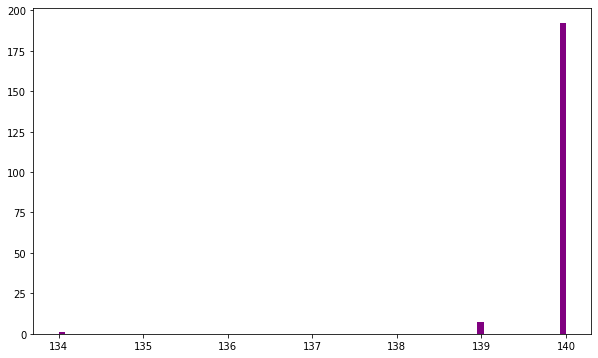

In [198]:
plt.figure(figsize =(10,6))
plt.hist(length_tweet_data, bins=80, label = "Tweets_data", color = "#800080")

##### Cleaning the tweets

In [199]:
tweet_data['clean_tweet'] = tweet_data['text'].apply(lambda x: preprocess_text(x))
tweet_data

,username,location,text,clean_tweet
0,Dhirajreddy47,"Hyderabad, India",RT @Dhirajreddy47: @nidhiindiatv Sir I am 10th...,sir th cbse student covid online cla...
1,HinduHridayasya,NaN,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...
2,aniket1897,Bharat,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...
4,ShahramBajkani1,Sindh,RT @raja_bajkani: According to world bank repo...,according world bank report pakistan la...
...,...,...,...,...
195,MuntahaYaseen,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic students forced give physical ex...
196,Sohailakram4714,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday...
197,raiimran,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday...
198,Bhumika_2828,NaN,The @DG_NTA thinks that only the students atte...,thinks students attempting jee affected onlin...


##### Calculating polarity and assigning labels to the tweets

In [200]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [201]:
tweet_data['pol']=tweet_data['clean_tweet'].apply(getPolarity)

In [202]:
tweet_data["Label"]=tweet_data['pol'].apply(lambda x: "Positive" if (x>0) else("Negative" if (x<0) else "Neutral"))

##### Splitting into train data and test data

In [203]:
merge=tweet_data.sample(frac=0.8,random_state=200) #random state is a seed value
test=tweet_data.drop(merge.index)

In [204]:
merge

,username,location,text,clean_tweet,pol,Label
121,Yidi70797842,NaN,"During the COVID-19 period, do you feel that t...",covid period feel academic pressure online...,0.000000,Neutral
169,NaMaloo06565085,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic students forced give physical ex...,-0.150000,Negative
194,__AM_1_,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic students forced give physical ex...,-0.150000,Negative
125,eed_raza,"Islamabad, Pakistan","RT @ansa_murtza: During the pandemic, students...",pandemic students forced give campus exam...,-0.050000,Negative
36,Taraktogenos,"Telangana, Bharat.","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...,-0.400000,Negative
...,...,...,...,...,...,...
90,AfrazNaeem1,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic students forced give physical ex...,-0.150000,Negative
162,awaisspeaks1,"Punjab, Pakistan","RT @MujeebMalik055: During pandemic, students ...",pandemic students forced give physical ex...,-0.150000,Negative
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...,-0.400000,Negative
120,poll_person,NaN,"RT @Yidi70797842: During the COVID-19 period, ...",covid period feel academic pressure on...,0.000000,Neutral


##### Lemmatizing the tweets

In [205]:
lemmatize_tweet = tweet_data.copy()
lemmatize_tweet['clean_tweet'] = lemmatize_tweet['clean_tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [206]:
lemmatize_tweet

,username,location,text,clean_tweet,pol,Label
0,Dhirajreddy47,"Hyderabad, India",RT @Dhirajreddy47: @nidhiindiatv Sir I am 10th...,sir th cbse student covid online class board e...,0.000,Neutral
1,HinduHridayasya,NaN,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online class stumb...,-0.400,Negative
2,aniket1897,Bharat,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online class stumb...,-0.400,Negative
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online class stumb...,-0.400,Negative
4,ShahramBajkani1,Sindh,RT @raja_bajkani: According to world bank repo...,according world bank report pakistan lac thous...,0.000,Neutral
...,...,...,...,...,...,...
195,MuntahaYaseen,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic student forced give physical exam alt...,-0.150,Negative
196,Sohailakram4714,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday march ...,-0.125,Negative
197,raiimran,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday march ...,-0.125,Negative
198,Bhumika_2828,NaN,The @DG_NTA thinks that only the students atte...,think student attempting jee affected online c...,0.000,Neutral


##### Tokenizing the tweets

In [207]:
tokenized_tweet = lemmatize_tweet['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [sir, th, cbse, student, covid, online, class,...
1    [covid, lockdown, boy, attended, online, class...
2    [covid, lockdown, boy, attended, online, class...
3    [covid, lockdown, boy, attended, online, class...
4    [according, world, bank, report, pakistan, lac...
Name: clean_tweet, dtype: object

In [208]:
tokenized_tweet

0      [sir, th, cbse, student, covid, online, class,...
1      [covid, lockdown, boy, attended, online, class...
2      [covid, lockdown, boy, attended, online, class...
3      [covid, lockdown, boy, attended, online, class...
4      [according, world, bank, report, pakistan, lac...
                             ...                        
195    [pandemic, student, forced, give, physical, ex...
196    [news, alert, convocation, scheduled, friday, ...
197    [news, alert, convocation, scheduled, friday, ...
198    [think, student, attempting, jee, affected, on...
199    [sir, th, cbse, student, covid, online, class,...
Name: clean_tweet, Length: 200, dtype: object

In [209]:
#tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
#tokenized_tweet.head()

In [210]:
tokenized_tweet

0      [sir, th, cbse, student, covid, online, class,...
1      [covid, lockdown, boy, attended, online, class...
2      [covid, lockdown, boy, attended, online, class...
3      [covid, lockdown, boy, attended, online, class...
4      [according, world, bank, report, pakistan, lac...
                             ...                        
195    [pandemic, student, forced, give, physical, ex...
196    [news, alert, convocation, scheduled, friday, ...
197    [news, alert, convocation, scheduled, friday, ...
198    [think, student, attempting, jee, affected, on...
199    [sir, th, cbse, student, covid, online, class,...
Name: clean_tweet, Length: 200, dtype: object

In [211]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

merge['clean_tweet'] = tokenized_tweet

In [212]:
merge

,username,location,text,clean_tweet,pol,Label
121,Yidi70797842,NaN,"During the COVID-19 period, do you feel that t...",covid period feel academic pressure online cla...,0.000000,Neutral
169,NaMaloo06565085,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic student forced give physical exam alt...,-0.150000,Negative
194,__AM_1_,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic student forced give physical exam alt...,-0.150000,Negative
125,eed_raza,"Islamabad, Pakistan","RT @ansa_murtza: During the pandemic, students...",pandemic student forced give campus exam altho...,-0.050000,Negative
36,Taraktogenos,"Telangana, Bharat.","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online class stumb...,-0.400000,Negative
...,...,...,...,...,...,...
90,AfrazNaeem1,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic student forced give physical exam alt...,-0.150000,Negative
162,awaisspeaks1,"Punjab, Pakistan","RT @MujeebMalik055: During pandemic, students ...",pandemic student forced give physical exam alt...,-0.150000,Negative
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online class stumb...,-0.400000,Negative
120,poll_person,NaN,"RT @Yidi70797842: During the COVID-19 period, ...",covid period feel academic pressure online cla...,0.000000,Neutral


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          7.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 192.]),
 array([134.   , 134.075, 134.15 , 134.225, 134.3  , 134.375, 134.45 ,
        134.525, 134.6  , 134.675, 134.75 , 134.825, 134.9  , 134.975,
        135.05 , 135.125, 135.2  , 135.275, 135.35 , 135.425, 135.5  ,
        135.575, 135.65 , 135.725, 135.8  , 135.875, 135.95 , 136.025,
        136.1  , 136.175, 136.25 , 136.325, 136.4  , 136.475, 136.55 ,
        136.625, 136.7  , 136.775, 136.85 , 136.925, 137.   , 137.075,
        137.15 , 137.225, 13

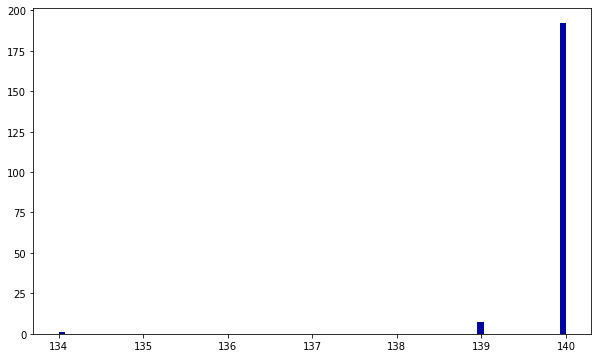

In [213]:
length_merge = merge['clean_tweet'].str.len()
plt.figure(figsize =(10,6))
plt.hist(length_tweet_data, bins=80, label = "Tweets_data", color = "#0000A0")

In [214]:
def Calculate_Len_NoOfWords(data):
    data['length']=merge['clean_tweet'].apply(len)
    data['word_count'] = merge['clean_tweet'].apply(lambda x: len(str(x).split()))
    return data

In [215]:
merge=Calculate_Len_NoOfWords(tweet_data)
merge

,username,location,text,clean_tweet,pol,Label,length,word_count
0,Dhirajreddy47,"Hyderabad, India",RT @Dhirajreddy47: @nidhiindiatv Sir I am 10th...,sir th cbse student covid online cla...,0.000,Neutral,57.0,10.0
1,HinduHridayasya,NaN,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...,-0.400,Negative,NaN,NaN
2,aniket1897,Bharat,"RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...,-0.400,Negative,80.0,12.0
3,FLXR98,"Apex, India","RT @OpIndia_com: During Covid-19 lockdown, the...",covid lockdown boy attended online cla...,-0.400,Negative,80.0,12.0
4,ShahramBajkani1,Sindh,RT @raja_bajkani: According to world bank repo...,according world bank report pakistan la...,0.000,Neutral,83.0,12.0
...,...,...,...,...,...,...,...,...
195,MuntahaYaseen,NaN,"RT @DrNumanOfficial: During pandemic, students...",pandemic students forced give physical ex...,-0.150,Negative,NaN,NaN
196,Sohailakram4714,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday...,-0.125,Negative,85.0,11.0
197,raiimran,NaN,RT @zaidia: *News Alert*\n\nConvocation schedu...,news alert convocation scheduled friday...,-0.125,Negative,NaN,NaN
198,Bhumika_2828,NaN,The @DG_NTA thinks that only the students atte...,thinks students attempting jee affected onlin...,0.000,Neutral,69.0,10.0


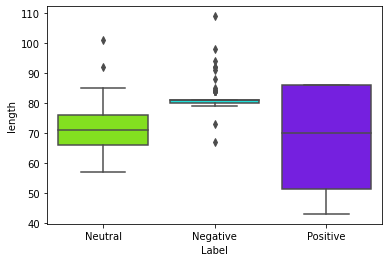

In [216]:
sns.boxplot(x='Label',y='length',data=merge,palette='hsv')

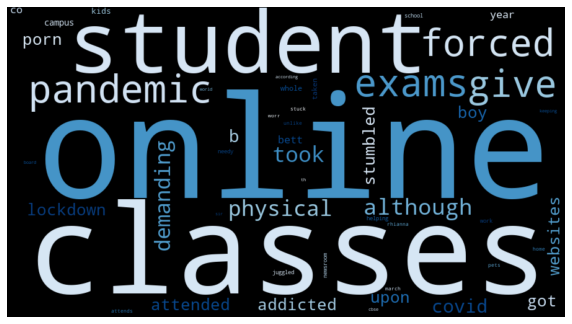

In [217]:
all_words = ' '.join([text for text in merge['clean_tweet']])
#wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      relative_scaling=0.5,
                      collocations=False,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [218]:
neutral_tweet = merge[merge.Label == 'Neutral']
positive_tweet = merge[merge.Label == 'Positive']
negative_tweet = merge[merge.Label == 'Negative']

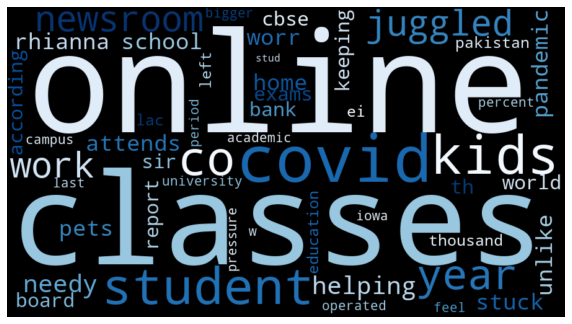

In [219]:
all_words = ' '.join([text for text in neutral_tweet['clean_tweet']])
#wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                
                      relative_scaling=0.5,
                      collocations=False,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

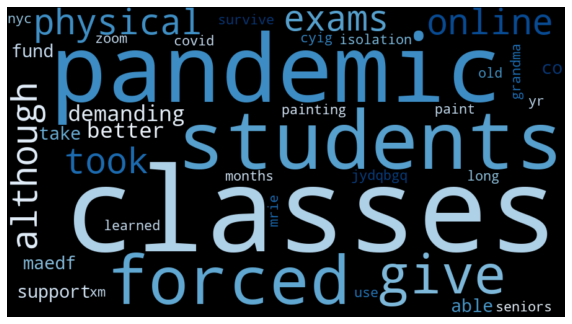

In [220]:
all_words = ' '.join([text for text in positive_tweet['clean_tweet']])
#wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                      
                      relative_scaling=0.5,
                      collocations=False,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

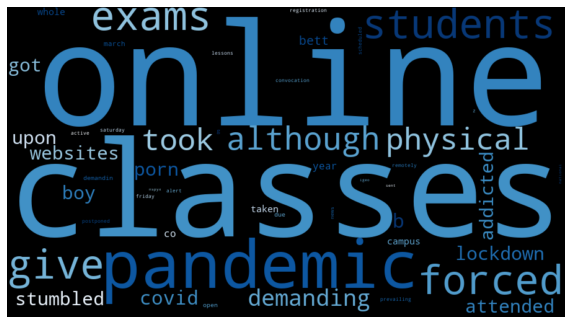

In [221]:
all_words = ' '.join([text for text in negative_tweet['clean_tweet']])
#wordfreq = Counter(all_words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=50,
                    
                      relative_scaling=0.5,
                      collocations=False,
                      colormap='Blues',
                      normalize_plurals=True).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

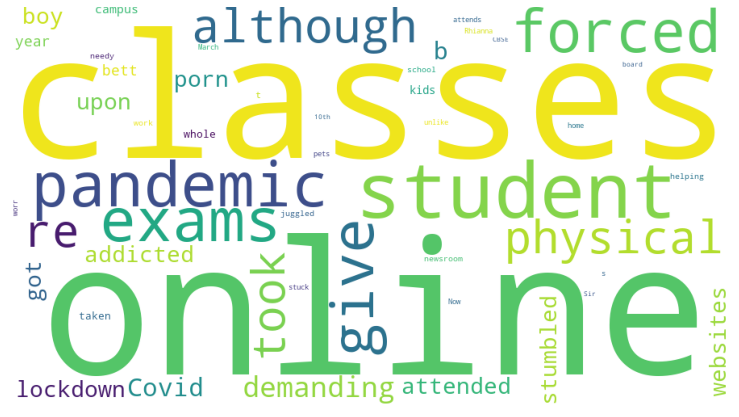

In [322]:
wordcloud_draw(merge['text'], color = 'white')

In [223]:
#pyLDAvis.sklearn.prepare(document_topics, dtm_tf, tf_vectorizer)

In [224]:
label = merge['Label']
tweets = merge['text']

In [225]:
#tweets_train, tweets_test, label_train, label_test = train_test_split(tweets, label, test_size=0.3)

In [226]:
from sklearn.decomposition import LatentDirichletAllocation

In [227]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(merge["clean_tweet"])

In [228]:
X

<200x171 sparse matrix of type '<class 'numpy.int64'>'
	with 382 stored elements in Compressed Sparse Row format>

In [229]:
lda = LatentDirichletAllocation(n_components=10, learning_method="batch",
                                max_iter=25, random_state=0)

document_topics = lda.fit_transform(X)

In [230]:
document_topics

array([[0.01428571, 0.01428571, 0.01428571, ..., 0.01428604, 0.01428571,
        0.01428571],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       ...,
       [0.00833333, 0.00833333, 0.00833333, ..., 0.00833345, 0.00833333,
        0.00833333],
       [0.01428571, 0.01428648, 0.01428646, ..., 0.01428729, 0.01429006,
        0.01428613],
       [0.01428571, 0.01428571, 0.01428571, ..., 0.01428604, 0.01428571,
        0.01428571]])

In [231]:
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim

import matplotlib.pyplot as plt 
import pandas as pd

In [232]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
sorting

array([[ 70,  82,  94, ..., 104, 163,  67],
       [137,   8, 128, ..., 163, 104,  67],
       [165,  18, 144, ..., 104,  67, 163],
       ...,
       [ 24,   3, 140, ..., 104, 163,  67],
       [ 24,  31,  79, ..., 104,  67, 163],
       [102,  14,   1, ..., 104,  67, 163]])

In [233]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]

feature_names = np.array(vect.get_feature_names())
feature_names

array(['able', 'academic', 'according', 'active', 'affected', 'alert',
       'anomaly', 'attempting', 'attends', 'bank', 'bcm', 'bett',
       'better', 'bi', 'bigger', 'board', 'bujey', 'bz', 'campus',
       'canadian', 'cbse', 'challenge', 'cla', 'clicks', 'co', 'continue',
       'convocation', 'cyig', 'cyn', 'dance', 'days', 'demandin',
       'district', 'dl', 'dsjpa', 'due', 'dvrq', 'education', 'ei',
       'enjoy', 'evolved', 'exercise', 'feel', 'finding', 'five', 'fl',
       'friday', 'fund', 'ghohbap', 'grades', 'grandma', 'half', 'hard',
       'helping', 'hoboken', 'home', 'htt', 'hvgwkjlv', 'imba', 'instit',
       'iowa', 'ism', 'isolation', 'jee', 'join', 'juggled', 'julian',
       'jydqbgq', 'keeping', 'kept', 'kids', 'kmif', 'kunz', 'kvy', 'lac',
       'last', 'learned', 'least', 'left', 'lessons', 'lgeo',
       'lifematterscancelcies', 'like', 'ljb', 'lk', 'long', 'maedf',
       'march', 'may', 'might', 'months', 'motivation', 'mrie',
       'national', 'needy'

In [239]:
tweet_lengths = [len(tokens) for tokens in feature_names]

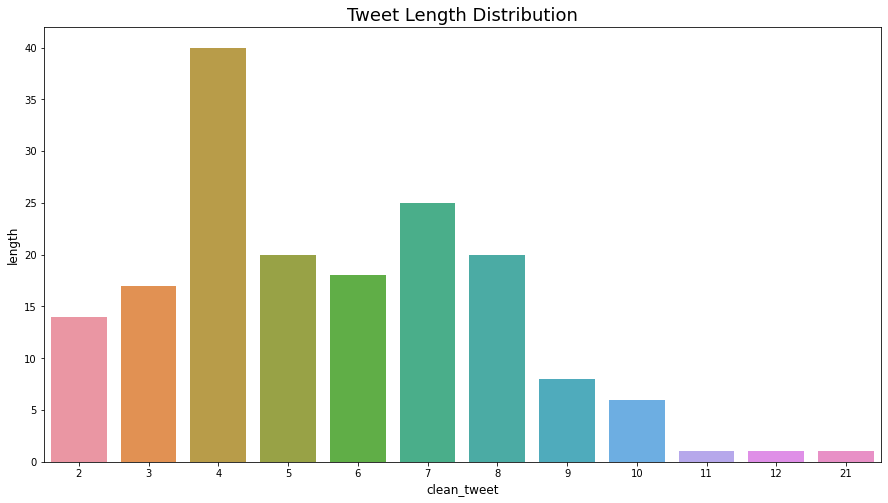

In [299]:
plt.figure(figsize = (15,8))
sns.countplot(tweet_lengths)
plt.title('Tweet Length Distribution', fontsize = 18)
plt.xlabel('feature_names', fontsize = 12)
plt.ylabel('length', fontsize = 12)
plt.show()

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  1.,  0.,  1.,  0.,  1.,  0.,  4.,  0.,  1.,  1.,  3.,  0.,
         0.,  1.,  1.,  0., 11., 43.,  0., 56.,  0.,  1., 15.,  2.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.]),
 array([ 43.   ,  43.825,  44.65 ,  45.475,  46.3  ,  47.125,  47.95 ,
         48.775,  49.6  ,  50.425,  51.25 ,  52.075,  52.9  ,  53.725,
         54.55 ,  55.375,  56.2  ,  57.025,  57.85 ,  58.675,  59.5  ,
         60.325,  61.15 ,  61.975,  62.8  ,  63.625,  64.45 ,  65.275,
         66.1  ,  66.925,  67.75 ,  68.575,  69.4  ,  70.225,  71.05 ,
         71.875,  72.7  ,  73.525,  74.35 ,  75.175,  76.   ,  76.825,
         77.65 ,  78.475,  79.3  ,  80.125,  80.95 ,  81.775,  82.6  ,
         83.425,  84.25 ,  85.075,  85.9  ,  

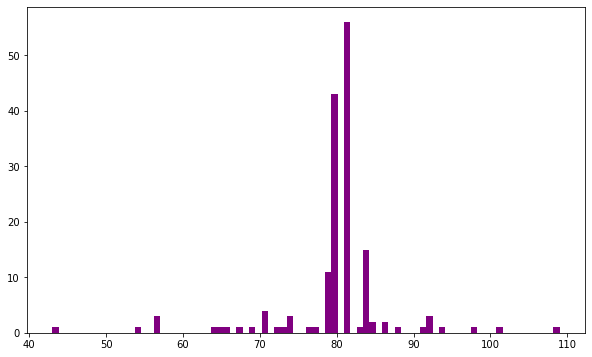

In [241]:
plt.figure(figsize =(10,6))
plt.hist(length_merge, bins=80, label = "feature_names", color = "#800080")

##### Creating pipeline

In [242]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [243]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,classification_report
cv = CountVectorizer()

In [244]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
     ('classifier',LogisticRegression()),
])

In [245]:
pipeline.fit(tweets,label)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [246]:
predictions = pipeline.predict(tweets)


In [247]:
print(confusion_matrix(label,predictions))
print('\n')
print(classification_report(label,predictions))

[[172   0   0]
 [  0  22   0]
 [  6   0   0]]


              precision    recall  f1-score   support

    Negative       0.97      1.00      0.98       172
     Neutral       1.00      1.00      1.00        22
    Positive       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.94      0.97      0.96       200



In [248]:
pipe = make_pipeline (  TfidfVectorizer(min_df=5),
                        LogisticRegression())

In [249]:
param_grid1 ={'logisticregression__C' :[0.001,0.01,0.1,1,5,10,100],
"tfidfvectorizer__ngram_range" : [(1,1),(1,2)]}



In [250]:
grid1 = GridSearchCV(pipe,param_grid1,cv=5)

In [251]:
grid1.fit(tweets,label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 5, 10,
                                                   100],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)]})

In [271]:
predictions1 =grid1.predict(tweets)
print(confusion_matrix(label,predictions1))
print('\n')
print(classification_report(label,predictions1))

[[172   0   0]
 [  0  22   0]
 [  3   0   3]]


              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       172
     Neutral       1.00      1.00      1.00        22
    Positive       1.00      0.50      0.67         6

    accuracy                           0.98       200
   macro avg       0.99      0.83      0.89       200
weighted avg       0.99      0.98      0.98       200



In [272]:
param_grid2 ={'logisticregression__C' :[1,10,100],
"tfidfvectorizer__ngram_range" : [(1,1),(1,2),(1,3)]}

In [273]:
grid2 = GridSearchCV(pipe,param_grid2,cv=5)

In [274]:
grid2.fit(tweets,label)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [1, 10, 100],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 3)]})

In [275]:

predictions2 = grid2.predict(tweets)

print(confusion_matrix(label,predictions2))
print('\n')
print(classification_report(label,predictions2))

[[172   0   0]
 [  0  22   0]
 [  3   0   3]]


              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       172
     Neutral       1.00      1.00      1.00        22
    Positive       1.00      0.50      0.67         6

    accuracy                           0.98       200
   macro avg       0.99      0.83      0.89       200
weighted avg       0.99      0.98      0.98       200



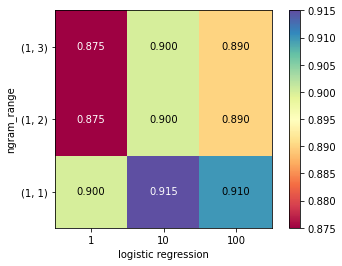

In [279]:
from matplotlib import pyplot as plt
# extract scores from grid_search
scores = grid2.cv_results_['mean_test_score'].reshape(-1, 3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="logistic regression", ylabel="ngram_range", cmap="Spectral", fmt="%.3f",
    xticklabels=param_grid2['logisticregression__C'],
    yticklabels=param_grid2['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)



###### Pipeline to predict the sentiment of test data

In [286]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [352]:
pipeline3 = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])

In [353]:
Y_test = test['Label']
X_test = test['text']

In [354]:
pipeline3.fit(tweets,label)
predictions3 = pipeline3.predict(X_test)
print(classification_report(predictions3,Y_test))
print(confusion_matrix(predictions3,Y_test))
print(accuracy_score(predictions3,Y_test))

              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97        37
     Neutral       1.00      0.50      0.67         2
    Positive       0.50      1.00      0.67         1

    accuracy                           0.95        40
   macro avg       0.82      0.82      0.77        40
weighted avg       0.96      0.95      0.95        40

[[36  0  1]
 [ 1  1  0]
 [ 0  0  1]]
0.95


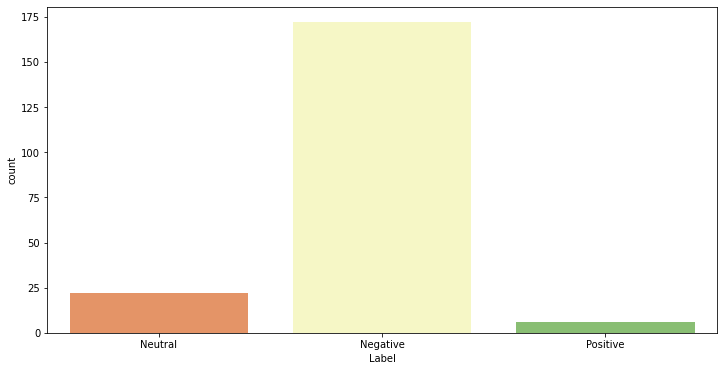

In [292]:
#Plotting sentiments against word count
plt.figure(figsize=(12,6))
sns.countplot(x='Label',data=merge,palette='RdYlGn')



In [310]:
#merge['Labels'] = merge['Labels'].apply(Score_Category)
Score_Category = merge['Label'].value_counts()

In [311]:
Score_Category

Negative    172
Neutral      22
Positive      6
Name: Label, dtype: int64

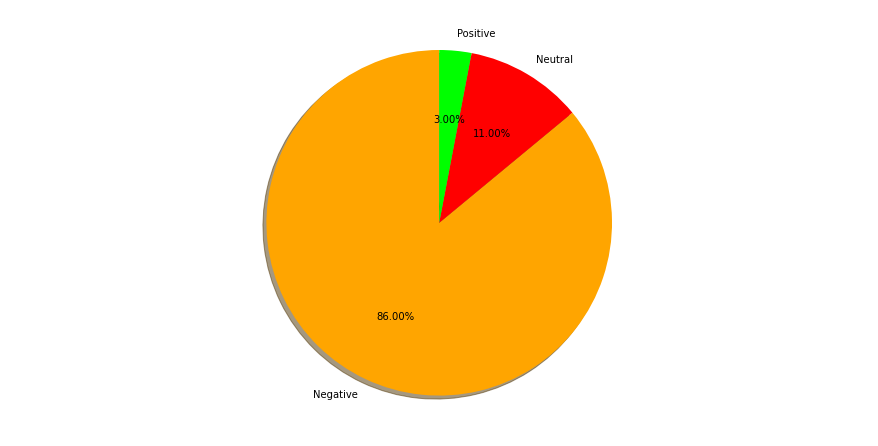

In [312]:
#Plotting pie chart to represent the percentage of each sentiment
#add colors
colors = ['#FFA500','#FF0000','#00FF00']
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Score_Category_value = ['Negative', 'Neutral', 'Positive']
ax.pie(Score_Category, labels = Score_Category_value, autopct='%1.2f%%', shadow=True, startangle=90, colors = colors)
plt.show()

In [313]:
#Showing how much tweets each label or sentiment have
temp = merge.groupby('Label').count()['clean_tweet'].reset_index().sort_values(by='clean_tweet',ascending=False)
temp.style.background_gradient(cmap='Purples')

,Label,clean_tweet
0,Negative,172
1,Neutral,22
2,Positive,6


In [314]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



###### Funnel graph showing sentiment distribution

In [315]:
fig = go.Figure(go.Funnelarea(
    text =temp.Label,
    values = temp.clean_tweet,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()
